In [27]:
import pandas as pd
import numpy as np

#Statistic
from scipy import stats

#Visualization
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, OneHotEncoder, StandardScaler
#Machine Learning identifying algorithms/Model
from sklearn.model_selection import train_test_split

#Machine Learning
# Classification
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


#Machine Learning Evaluation
from sklearn.metrics import top_k_accuracy_score, precision_score, recall_score, accuracy_score,  confusion_matrix  # Classification
     

In [2]:
df=pd.read_csv("C:\\Users\\Saravanan\\OneDrive\\Desktop\\Datasets_data\\water_potability.csv")

In [3]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


# Dataframe Observation

Dependent -'Potability'
Independent -['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
              'Organic_carbon', 'Trihalomethanes', 'Turbidity']



# Supervised
     

In [4]:
continuous_columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']
category_columns = ['Potability']

# Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
df.Sulfate.value_counts()

Sulfate
368.516441    1
301.230848    1
391.918229    1
330.905370    1
402.313427    1
             ..
359.710517    1
389.219586    1
337.231469    1
396.091917    1
359.948574    1
Name: count, Length: 2495, dtype: int64

In [ ]:
df.ph.fillna(method='bfill',inplace=True)
df.Sulfate.fillna(method='bfill',inplace=True)
df.Trihalomethanes.fillna(method='bfill',inplace=True)

In [9]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            4
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [10]:
df.duplicated().sum()

0

# Statistical Analysis/ Hypothesis Testing

Continuous - Central Limit Theorem, 1-Tailed Test (one-sample t-test)

Continuous vs. Continuous - Correlation, 2-Tailed Test (two-sample t-test)

Continuous vs. Categorical - ANOVA (Analysis of Variance)

Categorical vs. Categorical - Chi-Square Test

In [11]:
def hypothesisTesting(continuous_columns=[], category_columns=[], sampling_rate=0.20, sampling_frac=0.05):
    # Central Limit Theorem
    oneContinuousColumn_result = {}
    hypothesis_df = pd.DataFrame(columns=df.columns, index=df.columns)
    
    if continuous_columns:
        samplesize = int(sampling_rate * len(df[continuous_columns[0]]))
        for column in continuous_columns:
            population = df[column].values
            population_mean = population.mean()
            sample_mean = []
            for i in range(40):
                sample = np.random.choice(population, samplesize)
                sample_mean.append(sample.mean())
            oneContinuousColumn_result[column] = {
                "Population Mean": population_mean,
                "Sample Means": {np.mean(sample_mean)}
            }

    # 1-Tailed Test
    if continuous_columns:
        samplesize = int(sampling_rate * len(df[continuous_columns[0]]))
        for column in continuous_columns:
            H0_accepted = 0
            H0_rejected = 0
            for i in range(samplesize):
                sample = df[column].sample(frac=sampling_frac)
                t_test, p_value = stats.ttest_1samp(sample, df[column].mean())
                if p_value > 0.5:
                    H0_accepted += 1
                else:
                    H0_rejected += 1

            if H0_accepted > H0_rejected:
                oneContinuousColumn_result[column].update({
                    "H0_accepted": H0_accepted,
                    "H0_rejected": H0_rejected,
                    "Conclusion": "H0 is accepted, Ha is rejected, There is no significant effect"
                })
                hypothesis_df.loc[column, column] = "There is a relationship"
            else:
                oneContinuousColumn_result[column].update({
                    "H0_accepted": H0_accepted,
                    "H0_rejected": H0_rejected,
                    "Conclusion": "H0 is rejected, Ha is accepted, There is a significant effect"
                })
                hypothesis_df.loc[column, column] = "There is no relationship"

    # 2-Tailed Test
    for i in range(len(continuous_columns) - 1):
        column_1 = continuous_columns[i]
        for column_2 in continuous_columns[i + 1:]:
            H0_accepted = 0
            H0_rejected = 0
            for i in range(20):
                sample1 = df[column_1].sample(frac=sampling_frac)
                sample2 = df[column_2].sample(frac=sampling_frac)
                t_test, p_value = stats.ttest_ind(sample1, sample2)
                if p_value > 0.5:
                    H0_accepted += 1
                else:
                    H0_rejected += 1

            if H0_accepted > H0_rejected:
                hypothesis_df.loc[column_1, column_2] = "There is a relationship"
                hypothesis_df.loc[column_2, column_1] = "There is a relationship"
            else:
                hypothesis_df.loc[column_1, column_2] = "There is no relationship"
                hypothesis_df.loc[column_2, column_1] = "There is no relationship"

    # Chi-Square Test
    if category_columns:
        for i in range(len(category_columns) - 1):
            column_1 = category_columns[i]
            for column_2 in category_columns[i + 1:]:
                data = pd.crosstab(df[column_1], df[column_2])
                observed_values = data.values
                chi2_stat, p_value, _, _ = stats.chi2_contingency(observed_values)

                if p_value > 0.05:
                    hypothesis_df.loc[column_1, column_2] = "There is no relationship"
                    hypothesis_df.loc[column_2, column_1] = "There is no relationship"
                else:
                    hypothesis_df.loc[column_1, column_2] = "There is a relationship"
                    hypothesis_df.loc[column_2, column_1] = "There is a relationship"

    # ANOVA
    if continuous_columns and category_columns:
        for category_column in category_columns:
            for continuous_column in continuous_columns:
                group = df[category_column].unique()
                data = {}
                for i in group:
                    data[i] = df[continuous_column][df[category_column] == i]

                f_value, p_value = stats.f_oneway(*[data[i] for i in group])
                if p_value > 0.05:
                    hypothesis_df.loc[category_column, continuous_column] = "There is a relationship"
                    hypothesis_df.loc[continuous_column, category_column] = "There is a relationship"
                else:
                    hypothesis_df.loc[category_column, continuous_column] = "There is no relationship"
                    hypothesis_df.loc[continuous_column, category_column] = "There is no relationship"

    return oneContinuousColumn_result, hypothesis_df

In [12]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.073032,-0.068213,-0.023433,0.021896,0.018673,0.054499,0.012463,-0.034797,0.000424
Hardness,0.073032,1.000000,-0.046899,-0.030054,-0.075576,-0.023915,0.003610,-0.015412,-0.014449,-0.013837
Solids,-0.068213,-0.046899,1.000000,-0.070148,-0.121417,0.013831,0.010242,-0.004702,0.019546,0.033743
Chloramines,-0.023433,-0.030054,-0.070148,1.000000,0.014542,-0.020486,-0.012653,0.017118,0.002363,0.023779
Sulfate,0.021896,-0.075576,-0.121417,0.014542,1.000000,-0.009529,0.029011,-0.014986,0.013877,-0.023603
Conductivity,0.018673,-0.023915,0.013831,-0.020486,-0.009529,1.000000,0.020966,0.004609,0.005798,-0.008128
Organic_carbon,0.054499,0.003610,0.010242,-0.012653,0.029011,0.020966,1.000000,-0.017672,-0.027308,-0.030001
Trihalomethanes,0.012463,-0.015412,-0.004702,0.017118,-0.014986,0.004609,-0.017672,1.000000,-0.027891,0.014336
Turbidity,-0.034797,-0.014449,0.019546,0.002363,0.013877,0.005798,-0.027308,-0.027891,1.000000,0.001581
Potability,0.000424,-0.013837,0.033743,0.023779,-0.023603,-0.008128,-0.030001,0.014336,0.001581,1.000000


In [13]:
ContinesColumn_result, comperativeColumn_result = hypothesisTesting(continuous_columns , category_columns)

In [14]:

ContinesColumn_result_df = pd.DataFrame(ContinesColumn_result)
ContinesColumn_result_df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Population Mean,7.068424,196.369496,22014.092526,7.122277,NaN,426.205111,14.28497,66.501175,3.966786
Sample Means,{7.0764348309771306},{196.43944439420346},{22016.68246520688},{7.126475778551017},{nan},{426.0092704349022},{14.28967029230804},{66.3228944317698},{3.9622656238806444}
H0_accepted,328,338,320,356,270,325,336,330,334
H0_rejected,327,317,335,299,385,330,319,325,321
Conclusion,"H0 is accepted, Ha is rejected, There is no si...","H0 is accepted, Ha is rejected, There is no si...","H0 is rejected, Ha is accepted, There is a sig...","H0 is accepted, Ha is rejected, There is no si...","H0 is rejected, Ha is accepted, There is a sig...","H0 is rejected, Ha is accepted, There is a sig...","H0 is accepted, Ha is rejected, There is no si...","H0 is accepted, Ha is rejected, There is no si...","H0 is accepted, Ha is rejected, There is no si..."


In [15]:
comperativeColumn_result

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,There is a relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship
Hardness,There is no relationship,There is a relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship
Solids,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship
Chloramines,There is no relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship
Sulfate,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship
Conductivity,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship
Organic_carbon,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship,There is no relationship,There is a relationship
Trihalomethanes,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship,There is a relationship
Turbidity,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship,There is a relationship
Potability,There is a relationship,There is a relationship,There is a relationship,There is a relationship,There is no relationship,There is a relationship,There is a relationship,There is a relationship,There is a relationship,NaN


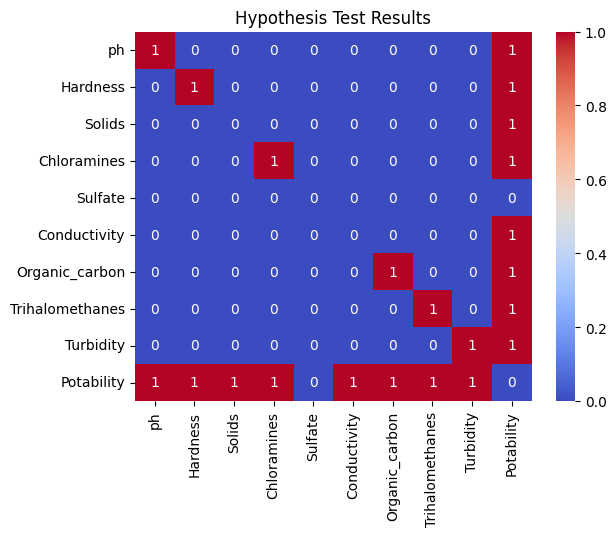

In [16]:
sns.heatmap(comperativeColumn_result == 'There is a relationship', annot=True, cmap='coolwarm')
plt.title('Hypothesis Test Results')
plt.show()

In [17]:
sns.set()
comperativeColumn_result.fillna(3, inplace = True)
comperativeColumn_result.replace({'There is a relationship': 0, 'There is no relationship': 1}, inplace=True)
fig = px.imshow(comperativeColumn_result, color_continuous_scale='Viridis',
                title="Correlation Matrix")
fig.show()

C:\Users\Saravanan\AppData\Local\Temp\ipykernel_15212\1962030792.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  comperativeColumn_result.replace({'There is a relationship': 0, 'There is no relationship': 1}, inplace=True)


# Data Visualisation

In [18]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,3.716080,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,356.886136,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,356.886136,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


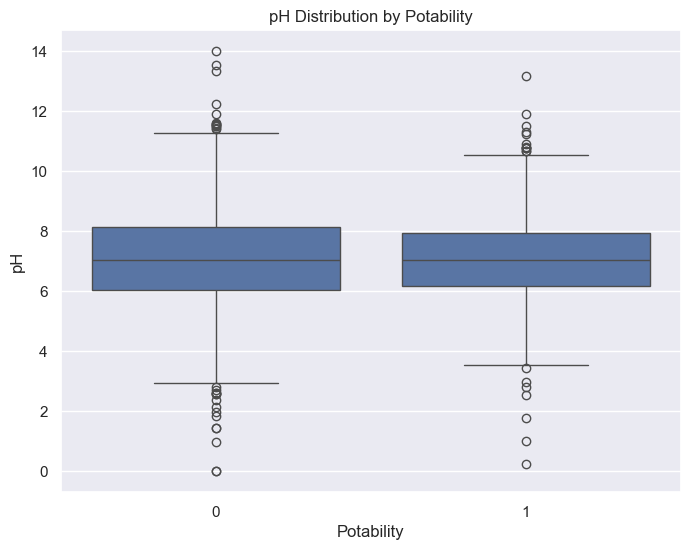

In [19]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='Potability', y='ph', data=df)
plt.title('pH Distribution by Potability')
plt.xlabel('Potability')
plt.ylabel('pH')
plt.show()

Text(0.5, 1.0, 'pH Distribution')

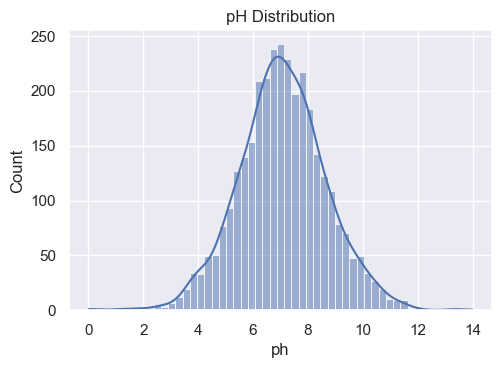

In [20]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(df['ph'], kde=True)
plt.title('pH Distribution')

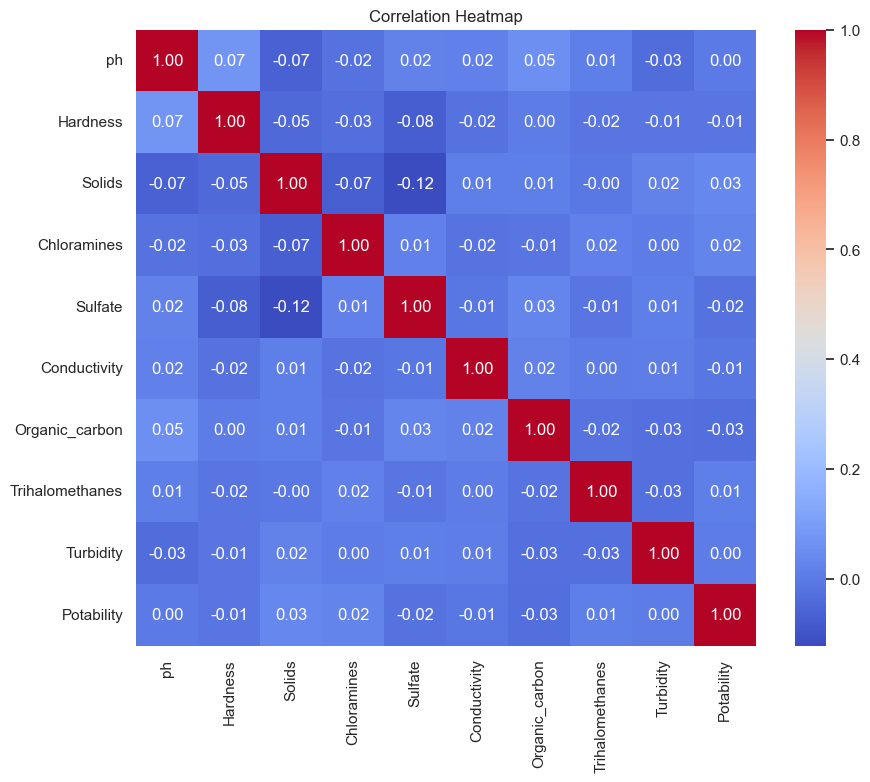

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

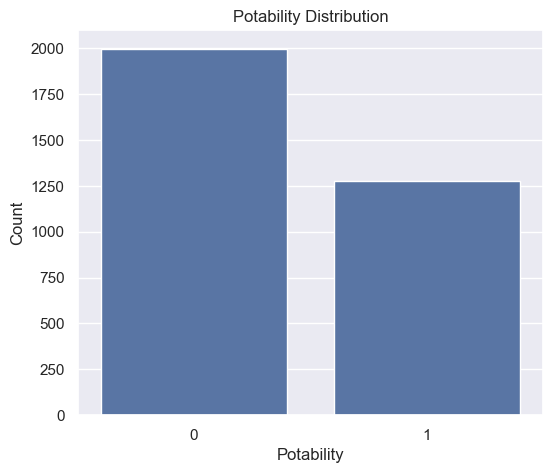

In [22]:
plt.figure(figsize=(6, 5))
sns.countplot(x='Potability', data=df)
plt.title('Potability Distribution')
plt.xlabel('Potability')
plt.ylabel('Count')
plt.show()

# Machine Learning

In [23]:
x=df.drop(['Potability'], axis=1)
y=df['Potability']

In [28]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10)

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score

class Classification_models:
  def __init__(self,x_train,x_test,y_train,y_test):
    self.x_train = x_train
    self.x_test = x_test
    self.y_train = y_train
    self.y_test = y_test

  def decisiontree(self):
    from sklearn.tree import DecisionTreeClassifier
    model = DecisionTreeClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print('Decision Tree Classifier accuracy score: ',accuracy)
    return accuracy

  def RandomForestClassifier(self):
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print('Random Forest Classifier accuracy score: ',accuracy)
    return accuracy

  def Logistic(self):
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print('Random Forest Classifier accuracy score: ',accuracy)
    return accuracy
  def SupertVector(self):
    from sklearn import svm
    model = svm.SVC().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print('Support vector machines accuracy score: ',accuracy)
    return accuracy

  def KNeighborsClassifier(self):
    from sklearn.neighbors import KNeighborsClassifier
    model = KNeighborsClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print('KNeighbors Classifier accuracy score: ',accuracy)
    return accuracy

  def GaussianNaiveBayes(self):
    from sklearn.naive_bayes import GaussianNB
    model=GaussianNB().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print("Naive Bayes Classifier accuracy score: ",accuracy)
    return accuracy

  def GradientBoosting(self):
    from sklearn.ensemble import GradientBoostingClassifier
    model = GradientBoostingClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy  = accuracy_score(y_test,y_pred)
    print("Gradient Boosting Classifier accuracy score: ",accuracy)
    return accuracy
def AdaBoost(self):
    from sklearn.ensemble import AdaBoostClassifier
    model = AdaBoostClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print("AdaBoost Classifier accuracy score: ",accuracy)
    return accuracy

def SGDClassifier(self):
    from sklearn.linear_model import SGDClassifier
    model = SGDClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print("SGD Classifier accuracy score: ",accuracy)
    return accuracy

def MLPClassifier(self):
    from sklearn.neural_network import MLPClassifier
    model = MLPClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print("Neural network models accuracy score: ",accuracy)
    return accuracy

def NearestCentroid(self):
    from sklearn.neighbors import NearestCentroid
    model = NearestCentroid().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print("Nearest Neighbors accuracy score: ",accuracy)
    return accuracy
def LGBMClassifier(self):
    from lightgbm import LGBMClassifier
    model = LGBMClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print("LGBM Classifier accuracy score: ",accuracy)
    return accuracy
     

In [ ]:
model = Classification_models(x_train,x_test,y_train,y_test)
accuracy_scores = {
    'DecisionTree': model.decisiontree(),
    'RandomForest': model.RandomForestClassifier(),
    #'SupertVector': model.SupertVector(),
    #'KNeighborsClassifier' : model.KNeighborsClassifier(),
    #'GaussianNaiveBayes' : model.GaussianNaiveBayes(),
    #'GradientBoosting' : model.GradientBoosting(),
    #'AdaBoost' : model.AdaBoost(),
    # 'SGDClassifier' : model.SGDClassifier(),
    # 'MLPClassifier' : model.MLPClassifier(),
    # 'NearestCentroid' : model.NearestCentroid(),
    'LGBMClassifier' : model.LGBMClassifier(),
    'Logistic' : model.Logistic()}

max_score_classifier = max(accuracy_scores, key=accuracy_scores.get)
max_accuracy_score = accuracy_scores[max_score_classifier]

print(f"\nMaximum accuracy score: {max_accuracy_score:.4f} achieved by {max_score_classifier} classifier.\n")

In [38]:
from lightgbm import LGBMClassifier
model = LGBMClassifier().fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("LGBM Classifier accuracy score: ",accuracy)
     

[LightGBM] [Info] Number of positive: 1162, number of negative: 1786
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000373 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 2948, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.394166 -> initscore=-0.429836
[LightGBM] [Info] Start training from score -0.429836
LGBM Classifier accuracy score:  0.6737804878048781


In [39]:
# Classification
kas = top_k_accuracy_score(y_test, y_pred)
ps = precision_score(y_test, y_pred)
rs = recall_score(y_test, y_pred)

kas, ps, rs
     

c:\Users\Saravanan\OneDrive\Desktop\Dataset\.venv\Lib\site-packages\sklearn\metrics\_ranking.py:1988: UndefinedMetricWarning:

'k' (2) greater than or equal to 'n_classes' (2) will result in a perfect score and is therefore meaningless.



(1.0, 0.5529411764705883, 0.4051724137931034)